In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/Bhaav-Dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20304 entries, 0 to 20303
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentences   20304 non-null  object
 1   Annotation  20304 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 317.4+ KB


In [4]:
df.head()

,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1


In [5]:
df['Annotation'].nunique()

5

In [6]:
df['Annotation'].value_counts()

Annotation
4    11697
2     3168
1     2463
3     1512
0     1464
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Sentences     0
Annotation    0
dtype: int64

In [8]:
df['annot'] = df['Annotation'].map({0: 'Anger', 1: 'Joy', 2: 'Sad', 3: 'Suspense', 4: 'Neutral'})

In [9]:
df.sample(10)

,Sentences,Annotation,annot
9553,काफी देर तक वह इसी तरह खड़ा रहा,4,Neutral
1526,और शीघ्रता से दरवाजे की ओर बढ़ा,2,Sad
14405,उसके परिवार की आर्थिक स्थिति ठीक नहीं थी,4,Neutral
1025,फिर उसे कोई जीत नहीं सकता,4,Neutral
18802,मैं तो एक जन्मपत्री बना रहा था,4,Neutral
11677,लेकिन क्या तुम में इतनी शक्ति भी है कि इसे अपन...,4,Neutral
340,"एक चिमटा जमा दूँ, तो तुम लोगों के सारे खिलौनों...",1,Joy
11072,मैं ने दलाल के साथ जा कर उसे हार दिखाया,4,Neutral
16810,टुन्ना की मां उन पौधों को नियमित रूप से पानी द...,4,Neutral
183,"कोई इक्के-ताँगे पर सवार, कोई मोटर पर, सभी इत्र...",1,Joy


In [10]:
df.to_csv('bhaav-labeled.csv', index=False)

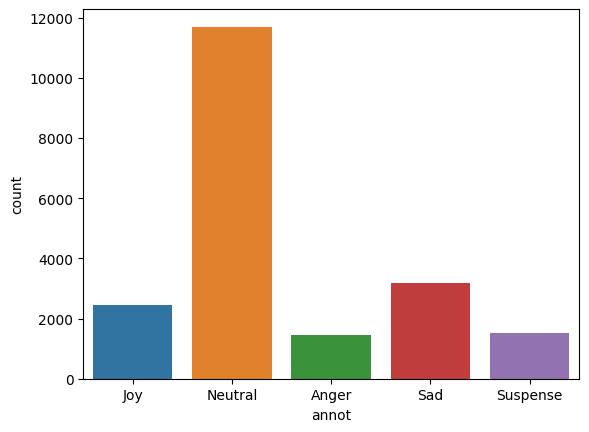

In [11]:
sns.countplot(x='annot', data=df);

In [12]:
len(df)

20304

In [13]:
df = df[df['Annotation'] != 3]

In [14]:
len(df)

18792

In [15]:
def create_labels(annotation):
    if annotation in [0, 2]:
        return -1
    if annotation == 1:
        return 1
    if annotation == 4:
        return 0

In [16]:
df['label'] = df['Annotation'].apply(create_labels)

In [17]:
df['label'].unique()

array([ 1,  0, -1])

In [18]:
df['label'].value_counts()

label
 0    11697
-1     4632
 1     2463
Name: count, dtype: int64

In [19]:
test_df = df.sample(frac=0.005)

In [20]:
x = test_df['Sentences'].to_list()

In [21]:
len(x)

94

In [22]:
from transformers import pipeline
from deep_translator import GoogleTranslator

In [23]:
classifier = pipeline('sentiment-analysis', model='../distilBert/', framework='pt')

In [24]:
def getLabel(text: str) -> dict:
    text = GoogleTranslator(source='auto', target='en').translate(text)
    result = classifier(text)[0]
    
    if result['score'] < 0.75:
        result['label'] = 'NEUTRAL'
    
    return result

In [25]:
getLabel('वह तटस्थ रहा जबकि उसके भाइयों ने बहस की')

{'label': 'NEGATIVE', 'score': 0.8530972003936768}

In [26]:
getLabel('किसी ने एक रोजा रखा है, वह भी दोपहर तक, किसी ने वह भी नहीं, लेकिन ईदगाह जाने की खुशी उनके हिस्से की चीज है')

{'label': 'POSITIVE', 'score': 0.9995228052139282}

In [27]:
getLabel('उनकी कल्पना तो राई का पर्वत बना लेती है')

{'label': 'POSITIVE', 'score': 0.9436970353126526}

In [28]:
y = [getLabel(i)['label'] for i in x]

In [29]:
test_df['pred'] = y

In [30]:
test_df.sample(30)

,Sentences,Annotation,annot,label,pred
19069,हाय ज्ञानू,2,Sad,-1,POSITIVE
11379,उसमें से एक बाँसुरी निकाल कर अमीना ने साफी को दी,4,Neutral,0,POSITIVE
4811,नाश्ते में आलू गोभी के परांठे और ठंडी लस्सी का...,1,Joy,1,POSITIVE
8847,"जादूगर बोला, अगर मैं इसे हाथ लगा पाता तो खुद ह...",0,Anger,-1,NEGATIVE
17072,हवा के सहारे उड़कर यह ऊंचाई तक पहुंच गईं,4,Neutral,0,POSITIVE
2629,"अगर वह साध्य हो जाए, तो आदर्श ही क्यों रहे",4,Neutral,0,NEUTRAL
20278,कैसे उसने पहली बार मुझे पेड़ के तने से सटा कर च...,1,Joy,1,POSITIVE
10874,वह परदा ही तो घर-भर की औरतों के शरीर का वस्त्र था,2,Sad,-1,NEGATIVE
19490,मगर मुझे पान लेने की कहाँ सुध थी,4,Neutral,0,NEGATIVE
4071,"उसे देखते ही बोलीं,'तुम्हारा लड़का बड़ा उजड्ड है",0,Anger,-1,NEUTRAL


In [31]:
test_df['pred'].value_counts()

pred
NEGATIVE    47
POSITIVE    40
NEUTRAL      7
Name: count, dtype: int64

In [32]:
test_df[test_df['pred']=='NEUTRAL']

,Sentences,Annotation,annot,label,pred
8022,लखनऊ में ऐसे सुअवसर कहाँ थे,4,Neutral,0,NEUTRAL
17229,"एक दिन ऐसा आया, जब जगन के बच्चे का विद्यालय मे...",4,Neutral,0,NEUTRAL
8888,"वहाँ जा कर उस ने आवाज दी,",4,Neutral,0,NEUTRAL
4071,"उसे देखते ही बोलीं,'तुम्हारा लड़का बड़ा उजड्ड है",0,Anger,-1,NEUTRAL
2629,"अगर वह साध्य हो जाए, तो आदर्श ही क्यों रहे",4,Neutral,0,NEUTRAL
16070,जमनालालजी को याद आया कि इस गली में रहने वाले उ...,4,Neutral,0,NEUTRAL
11657,मुझे देखकर नकाब डाल लिया और बाप से बिगड़ कर बो...,0,Anger,-1,NEUTRAL


In [33]:
test_df['translated'] = test_df['Sentences'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))

In [34]:
test_df[['translated','pred','annot']].head(30)

,translated,pred,annot
4228,"The wave of sensuality, debauchery and various...",NEGATIVE,Neutral
13082,He couldn't believe his eyes and the,NEGATIVE,Neutral
11379,"Taking out a flute from it, Amina gave it to S...",POSITIVE,Neutral
8022,Where were such opportunities in Lucknow,NEUTRAL,Neutral
18508,One day the chef's cook prepares rasgulla for ...,POSITIVE,Neutral
8157,because in no time the door opened and all the...,NEGATIVE,Neutral
1607,who will cook their food now,POSITIVE,Sad
13466,The daughter explained to him that you were ev...,NEGATIVE,Sad
3325,Again the same statue was peeping through the ...,NEGATIVE,Neutral
24,"Mohsin has one, two, three, eight, nine, fifte...",POSITIVE,Joy


In [35]:
classifier('So remembering his looted wealth, he started crying.')

[{'label': 'NEGATIVE', 'score': 0.9965961575508118}]

In [36]:
from requests import request

In [37]:
response = request(method="POST", url=f"http://127.0.0.1:5000/predict?text={'तिलोत्तमा का बाहु-बंधन ढीला पड़ गया'}")

In [38]:
response.json()

{'label': 'NEUTRAL', 'score': 0.5883834958076477}

In [39]:
test_df['pred']

4228     NEGATIVE
13082    NEGATIVE
11379    POSITIVE
8022      NEUTRAL
18508    POSITIVE
           ...   
5949     NEGATIVE
745      POSITIVE
8847     NEGATIVE
3356     NEGATIVE
1672     POSITIVE
Name: pred, Length: 94, dtype: object

In [40]:
test_df['pred'] = test_df['pred'].map({"POSITIVE": 1, "NEUTRAL": 0, "NEGATIVE": -1})

In [41]:
sum(test_df['label'] == test_df['pred'])

28